## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp_df = pd.read_csv(Path("./Resources/bitstamp.csv"), index_col = "Timestamp", parse_dates = True, infer_datetime_format = True)


### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
#Using .head() function to check the first 5 rows
bitstamp_df.head(5)

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase_df = pd.read_csv(Path("./Resources/coinbase.csv"), index_col= "Timestamp", parse_dates =True, infer_datetime_format = True)


In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
#Using .tail() function to display last 5 rows.
coinbase_df.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp_df = bitstamp_df.dropna()
bitstamp_df




,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $
bitstamp_df.loc[:,"Close"] = bitstamp_df.loc[:,"Close"].str.replace("$","")
bitstamp_df



/var/folders/sb/c0nmbv3s3psgb5fnp0s1g89m0000gn/T/ipykernel_1368/2019553874.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitstamp_df.loc[:,"Close"] = bitstamp_df.loc[:,"Close"].str.replace("$","")


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
# Convert the Close data type to a float
bitstamp_df.loc[:,"Close"]= bitstamp_df.loc[:,"Close"].astype('float')


#checking if "Close" has converted to float
display(bitstamp_df["Close"].dtype)



dtype('float64')

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary
bitstamp_df.drop_duplicates()




,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [10]:
# Repeat Steps 1–4 for the coinbase DataFrame
#remove NaN data from coinbase Dataframe
coinbase_df = coinbase_df.dropna()
#Removing '$' from "Close" column.
coinbase_df.loc[:,"Close"] = coinbase_df.loc[:,"Close"].str.replace("$","")
#Converting the data in the column "Close"to float.
coinbase_df.loc[:,"Close"]= coinbase_df.loc[:,"Close"].astype('float')
#Checking if data range in "Close" changed to float. 
coinbase_df["Close"].dtype
#Deleting any duplicate data, if any.
coinbase_df.drop_duplicates()

/var/folders/sb/c0nmbv3s3psgb5fnp0s1g89m0000gn/T/ipykernel_1368/1137459837.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coinbase_df.loc[:,"Close"] = coinbase_df.loc[:,"Close"].str.replace("$","")


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,6930.00,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,6933.91,0.776431,5382.532162,6932.405747


## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [11]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced_df = pd.DataFrame(bitstamp_df.loc[:,"Close"])
columns =["Close"]
bitstamp_sliced_df.columns = ["close"]

# Review the first five rows of the DataFrame
bitstamp_sliced_df.head()

,close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [12]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced_df = pd.DataFrame(coinbase_df.loc[:,"Close"])

# Review the first five rows of the DataFrame
coinbase_sliced_df.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [13]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_df.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,10459.842453,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,2315.976088,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,5944.000000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,8613.370000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,10145.950000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,11444.810000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,17234.980000,580.646391,5.483271e+06,17227.810502


In [14]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_df.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,10449.140958,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,2317.197419,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,5882.310000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,8609.230000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,10137.440000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,11397.237500,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,17177.990000,959.084903,1.152334e+07,17177.995495


<AxesSubplot:title={'center':'Bitstamp Bitcoin Closing Prices'}, xlabel='Timestamp'>

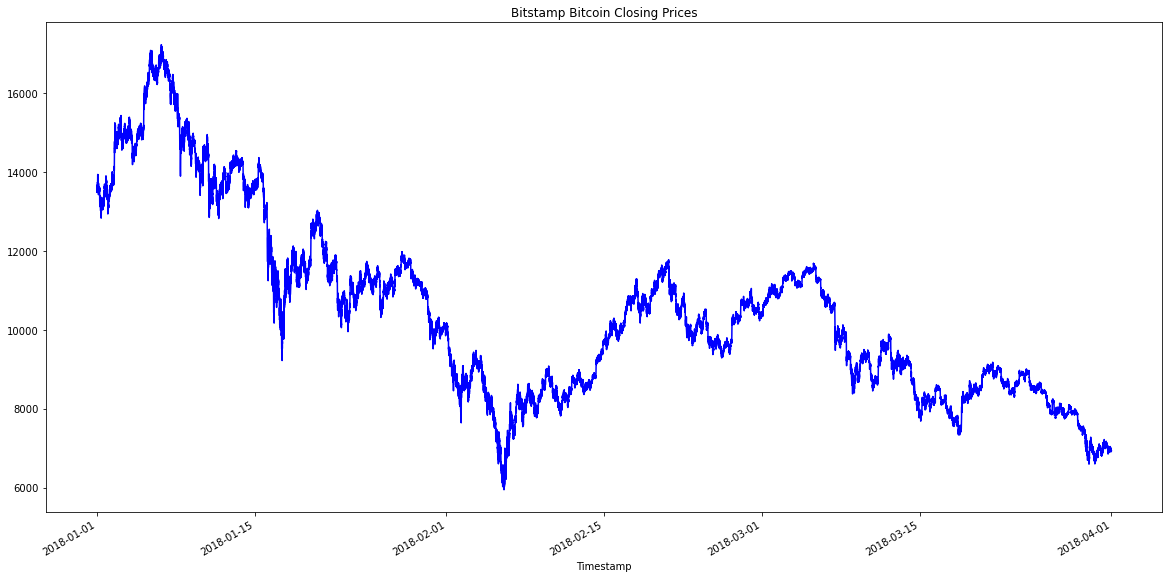

In [15]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
#Graph showing the closing price of Bitcoin on Bitstamp
bitstamp_df["Close"].plot(kind='line',figsize = (20,10), title = "Bitstamp Bitcoin Closing Prices", color ="blue")

<AxesSubplot:title={'center':'Coinbase Bitcoin Closing Prices'}, xlabel='Timestamp'>

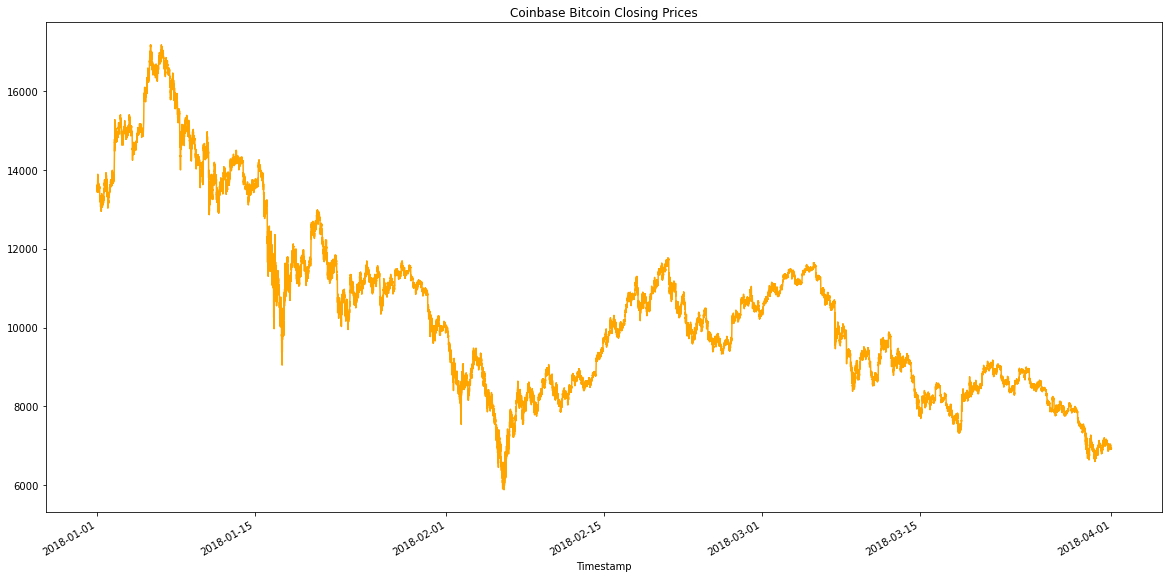

In [16]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
#Graph showing closing price of Bitcoin on Coinbase
coinbase_df["Close"].plot(kind='line', figsize=(20,10), title="Coinbase Bitcoin Closing Prices", color="orange")

<AxesSubplot:title={'center':'Bitcoin Closing Prices'}, xlabel='Timestamp'>

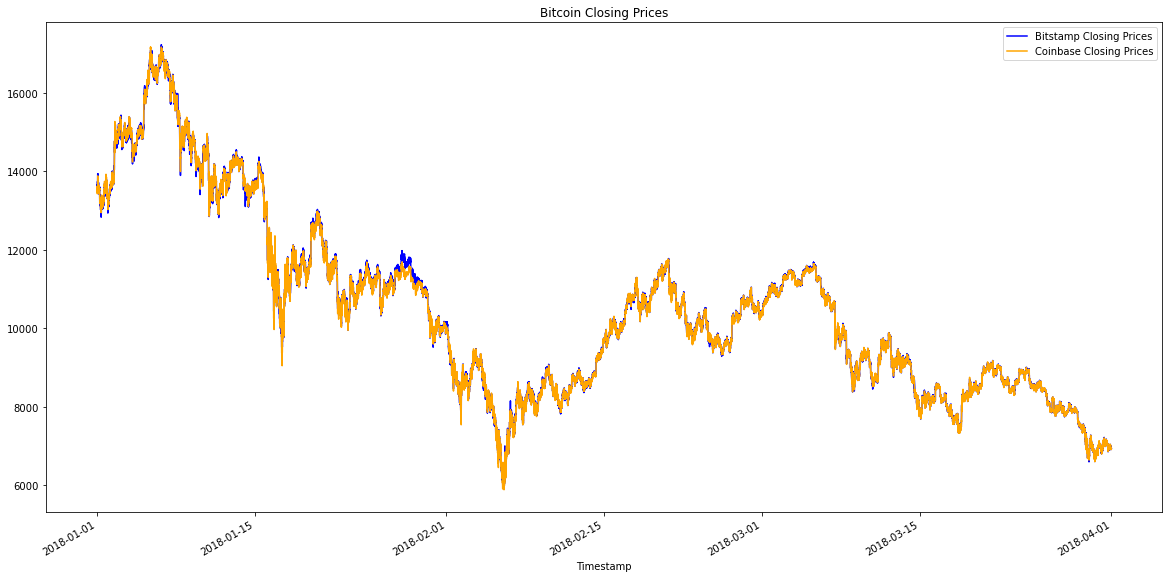

In [17]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_df["Close"].plot(legend=True,figsize = (20,10), title = "Bitcoin Closing Prices", color ="blue", label="Bitstamp Closing Prices")
coinbase_df["Close"].plot(legend=True, figsize=(20,10),color="orange", label="Coinbase Closing Prices")

<AxesSubplot:title={'center':"Bitcoin Closing Prices in January'18"}, xlabel='Timestamp'>

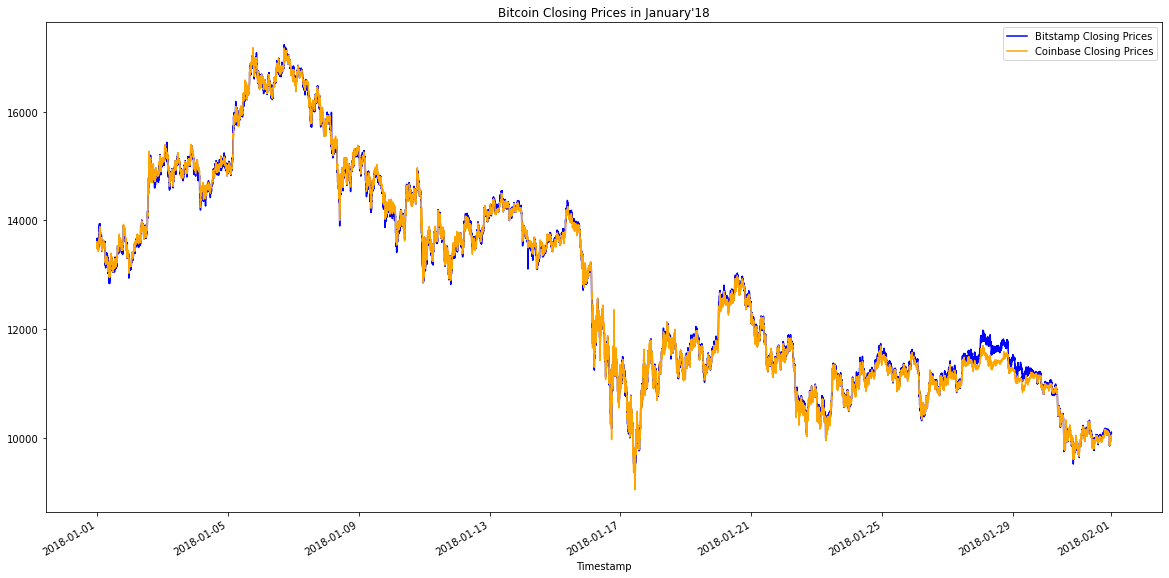

In [18]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_df.loc["2018-01-01 00:00:00":"2018-01-31 23:59:00","Close"].plot(legend=True,figsize = (20,10), title = "Bitcoin Closing Prices in January'18", color ="blue", label="Bitstamp Closing Prices")
coinbase_df.loc["2018-01-01 00:00:00":"2018-01-31 23:59:00","Close"].plot(legend=True, figsize=(20,10),color="orange", label="Coinbase Closing Prices")

<AxesSubplot:title={'center':"Bitcoin Closing Prices in February'18"}, xlabel='Timestamp'>

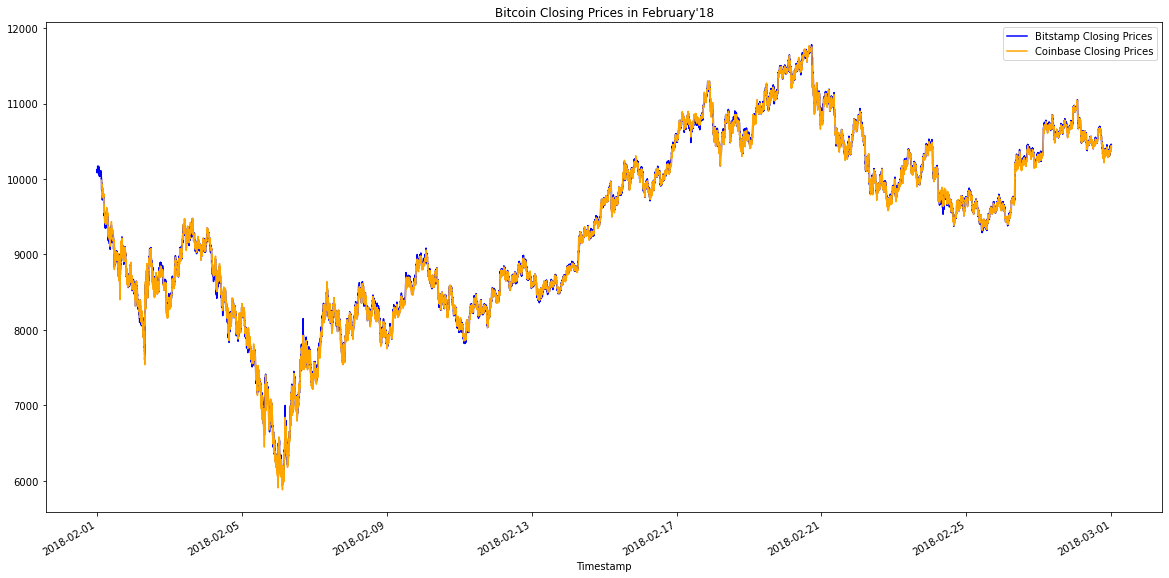

In [19]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_df.loc["2018-02-01":"2018-02-28","Close"].plot(legend=True,figsize = (20,10), title = "Bitcoin Closing Prices in February'18", color ="blue", label="Bitstamp Closing Prices")
coinbase_df.loc["2018-02-01":"2018-02-28","Close"].plot(legend=True, figsize=(20,10),color="orange", label="Coinbase Closing Prices")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Based on the visual comparisons, there seems to be some minor discrepancies in the prices of Bitcoin between Bitstamp and Coinbase. However, the spread or difference between the two crypto exchange platform do not seem so significant. Nevertheless, on 29th January, Coinbase has higher closing price;hence, an arbitrage opportunity. The spread disapades in the following month.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':"Bitcoin Closing Prices on Jan 5th '18"}, xlabel='Timestamp'>

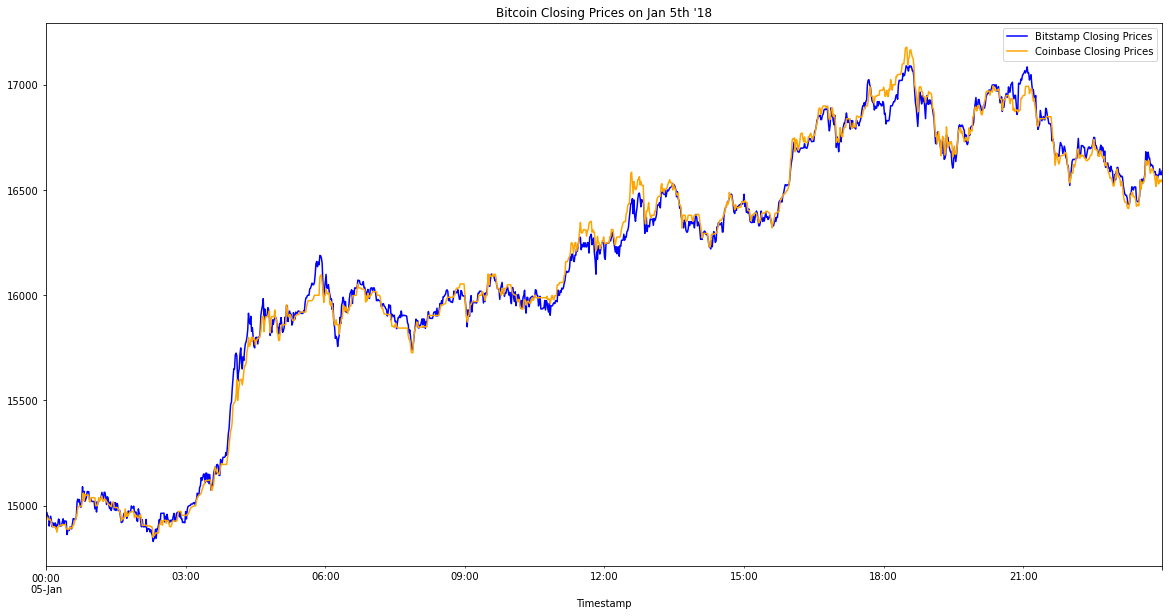

In [20]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_df.loc["2018-01-05 00:00:00":"2018-01-05 23:59:00","Close"].plot(legend=True,figsize = (20,10), title = "Bitcoin Closing Prices on Jan 5th '18", color ="blue", label="Bitstamp Closing Prices")
coinbase_df.loc["2018-01-05 00:00:00":"2018-01-05 23:59:00","Close"].plot(legend=True, figsize=(20,10),color="orange", label="Coinbase Closing Prices")

<AxesSubplot:title={'center':"Bitcoin Closing Prices on Feb 15th '18"}, xlabel='Timestamp'>

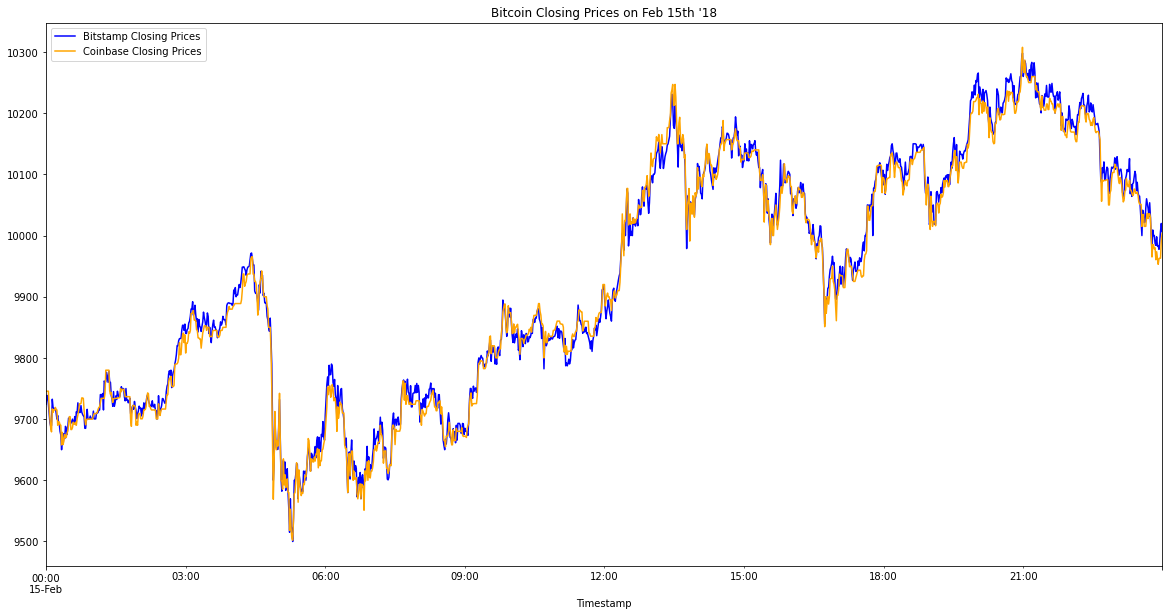

In [75]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_df.loc["2018-02-15":"2018-02-15","Close"].plot(legend=True,figsize = (20,10), title = "Bitcoin Closing Prices on Feb 15th '18", color ="blue", label="Bitstamp Closing Prices")
coinbase_df.loc["2018-02-15":"2018-02-15","Close"].plot(legend=True, figsize=(20,10),color="orange", label="Coinbase Closing Prices")

<AxesSubplot:title={'center':"Bitcoin Closing Prices on Mar 25th '18"}, xlabel='Timestamp'>

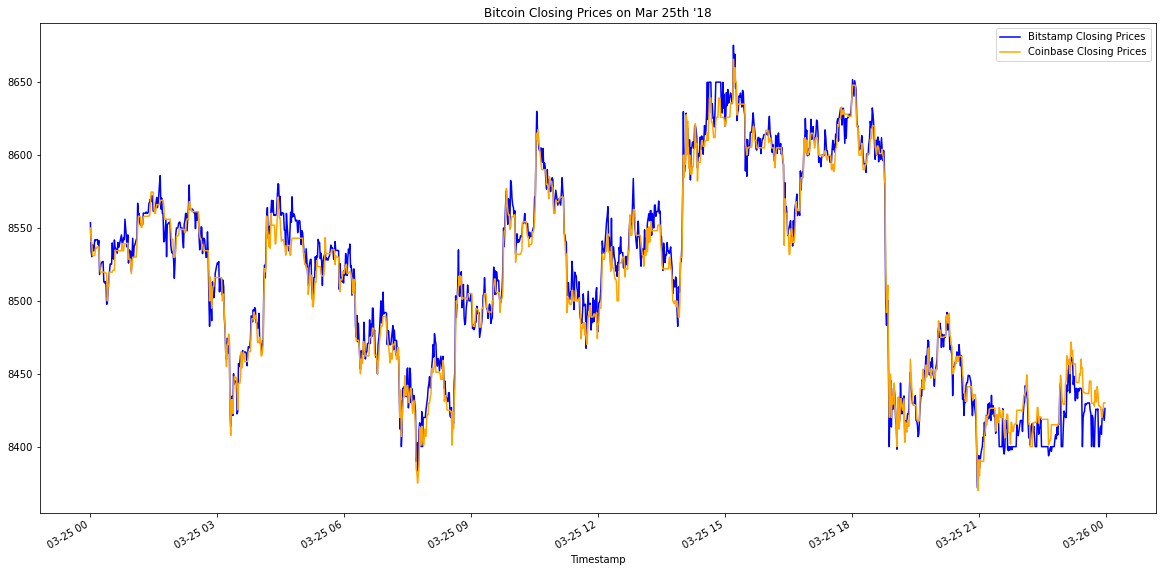

In [76]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_df.loc["2018-03-25 00:00:00":"2018-03-25 23:59:00","Close"].plot(legend=True,figsize = (20,10), title = "Bitcoin Closing Prices on Mar 25th '18", color ="blue", label="Bitstamp Closing Prices")
coinbase_df.loc["2018-03-25 00:00:00":"2018-03-25 23:59:00","Close"].plot(legend=True, figsize=(20,10),color="orange", label="Coinbase Closing Prices")

In [77]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

arbitrage_spread_early =  coinbase_df.loc["2018-01-05 00:00:00":"2018-01-05 23:59:00","Close"]-bitstamp_df.loc["2018-01-05 00:00:00":"2018-01-05 23:59:00","Close"]
# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1440.000000
mean        0.650535
std        44.027768
min      -216.930000
25%       -24.477500
50%        -0.055000
75%        26.000000
max       150.850000
Name: Close, dtype: float64

<AxesSubplot:>

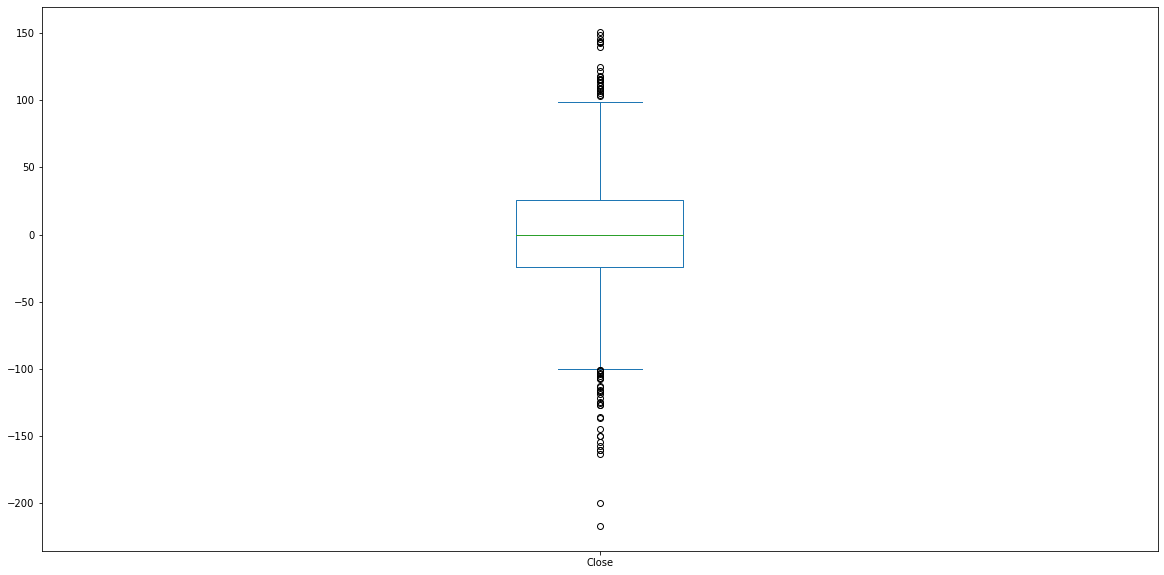

In [22]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box', figsize =(20,10))

In [ ]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

arbitrage_spread_middle = coinbase_df.loc["2018-02-15 00:00:00":"2018-02-15 23:59:00","Close"]-bitstamp_df.loc["2018-02-15 00:00:00":"2018-02-15 23:59:00","Close"]


# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1440.000000
mean       -5.760007
std        14.908671
min       -55.470000
25%       -16.217500
50%        -6.960000
75%         3.995000
max        48.800000
Name: Close, dtype: float64

<AxesSubplot:>

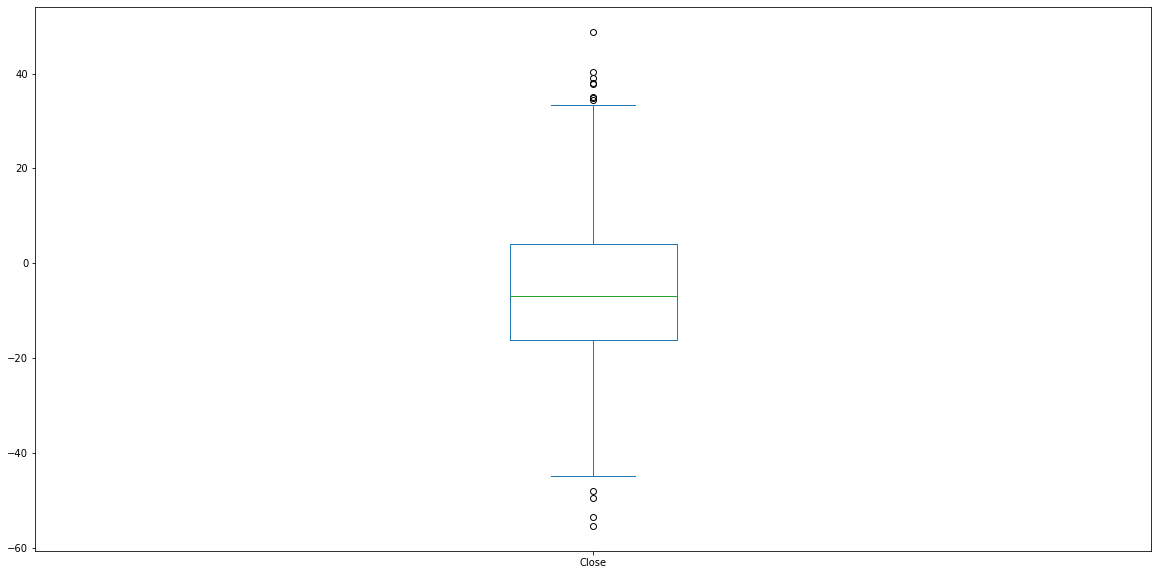

In [25]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box', figsize =(20,10))

In [27]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

arbitrage_spread_late = +coinbase_df.loc["2018-03-25 00:00:00":"2018-03-25 23:59:00","Close"]-bitstamp_df.loc["2018-03-25 00:00:00":"2018-03-25 23:59:00","Close"]

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1404.000000
mean       -2.294423
std         9.853020
min       -34.640000
25%        -8.810000
50%        -2.805000
75%         3.767500
max        53.940000
Name: Close, dtype: float64

<AxesSubplot:>

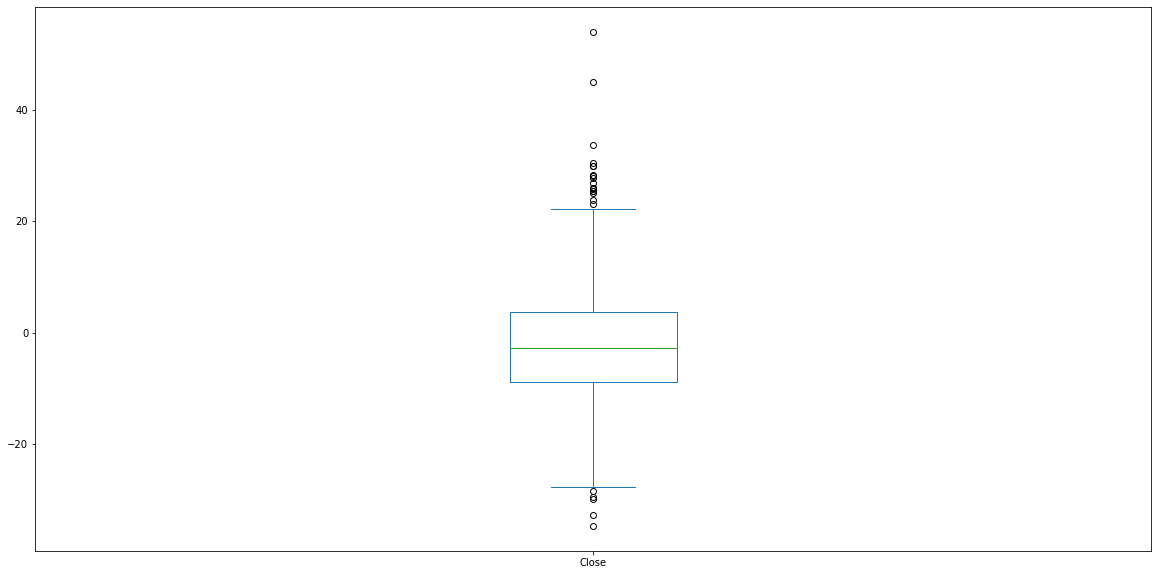

In [28]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box',figsize =(20,10))

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [81]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = abs(arbitrage_spread_early)
# For the date in the middle in the dataset, measure the arbitrage spread between the two exchanges
arbitrage_spread_middle = abs(arbitrage_spread_middle)
# For the date at the end in the dataset, measure the arbitrage spread between the two exchanges
arbitrage_spread_late = abs(arbitrage_spread_late)
# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early_df = arbitrage_spread_early[arbitrage_spread_early>0]
print("----Early Arbitrage Spread Summary---")
display(arbitrage_spread_early_df.describe())

print("---Middle Arbitrage Spread Summary---")
arbitrage_spread_middle_df = arbitrage_spread_middle[ arbitrage_spread_middle>0]
display(arbitrage_spread_middle_df.describe())
print("---Late Arbitrage Spread Summary---")
arbitrage_spread_late_df = arbitrage_spread_late[arbitrage_spread_late>0]
display(arbitrage_spread_late_df.describe())

----Early Arbitrage Spread Summary---


count    1437.000000
mean       32.917251
std        29.302192
min         0.010000
25%        12.260000
50%        25.100000
75%        43.420000
max       216.930000
Name: Close, dtype: float64

---Middle Arbitrage Spread Summary---


count    1436.000000
mean       13.088935
std         9.205527
min         0.010000
25%         5.692500
50%        11.655000
75%        18.980000
max        55.470000
Name: Close, dtype: float64

---Late Arbitrage Spread Summary---


count    1402.000000
mean        7.964971
std         6.245814
min         0.010000
25%         3.172500
50%         6.565000
75%        11.112500
max        53.940000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [82]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = (arbitrage_spread_early_df / bitstamp_df.loc["2018-01-05", "Close"])

spread_return_middle = (arbitrage_spread_middle_df/ bitstamp_df["Close"].loc["2018-02-15"])

spread_return_late = (arbitrage_spread_late_df/ bitstamp_df["Close"].loc["2018-03-25"])

# Review the spread return DataFrame
display(spread_return_early.head())

display(spread_return_middle.head())

display(spread_return_late.head())


Timestamp
2018-01-05 00:00:00    0.000401
2018-01-05 00:01:00    0.001613
2018-01-05 00:02:00    0.000470
2018-01-05 00:03:00    0.001076
2018-01-05 00:04:00    0.001954
Name: Close, dtype: float64

Timestamp
2018-02-15 00:00:00    0.002190
2018-02-15 00:01:00    0.000691
2018-02-15 00:02:00    0.000990
2018-02-15 00:03:00    0.002178
2018-02-15 00:04:00    0.000740
Name: Close, dtype: float64

Timestamp
2018-03-25 00:00:00    0.000429
2018-03-25 00:01:00    0.000704
2018-03-25 00:02:00    0.001134
2018-03-25 00:03:00    0.000880
2018-03-25 00:04:00    0.000394
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [55]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early>0.01]


# Review the first five profitable trades
display(profitable_trades_early.head())



Timestamp
2018-01-05 04:02:00    0.010415
2018-01-05 04:03:00    0.010224
2018-01-05 04:04:00    0.013802
2018-01-05 04:05:00    0.012719
Name: Close, dtype: float64

In [56]:
# For the date in middle in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle>0.01]
# Review the first five profitable trades
display(profitable_trades_middle.head())

Series([], Name: Close, dtype: float64)

In [57]:
# For the date later in the dataset, determine the number of times your trades with positive returns 
profitable_trades_late = spread_return_late[spread_return_late>0.01]
# Review the first five profitable trade
display(profitable_trades_late.head())

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [40]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
display(profitable_trades_early.describe())



count    4.000000
mean     0.011790
std      0.001756
min      0.010224
25%      0.010367
50%      0.011567
75%      0.012990
max      0.013802
Name: Close, dtype: float64

In [38]:
# For the date in the middle in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
display(profitable_trades_middle.describe())
#no profitable trades

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [39]:
# For the date later in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
display(profitable_trades_late.describe())
#no profitable trades

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [42]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
# the profit is reduced by 1% as a cost of operation, thus we multiplied it by 0.99
profit_early = profitable_trades_early*(bitstamp_df["Close"].loc["2018-01-05"])


# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()


# View the early profit DataFrame

display(profit_per_trade_early)



Timestamp
2018-01-05 04:02:00    163.00
2018-01-05 04:03:00    160.00
2018-01-05 04:04:00    216.93
2018-01-05 04:05:00    200.00
Name: Close, dtype: float64

In [43]:
#calculating potential profit for the middle data
profit_middle = profitable_trades_middle*(bitstamp_df["Close"].loc["2018-02-15"])
profit_per_trade_middle =profit_middle.dropna()
display(profit_per_trade_middle)

Series([], Name: Close, dtype: float64)

In [62]:
#calculating potential profit for the later data
profit_late = profitable_trades_late*bitstamp_df["Close"].loc["2018-03-25"]
profit_per_trade_late = profit_late.dropna()
display(profit_per_trade_late)

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [63]:
# Generate the summary statistics for the early profit per trade DataFrame
display(profit_per_trade_early.describe())
display(profit_per_trade_middle.describe())
display(profit_per_trade_late.describe())

count      4.000000
mean     184.982500
std       28.009068
min      160.000000
25%      162.250000
50%      181.500000
75%      204.232500
max      216.930000
Name: Close, dtype: float64

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Early Arbitrage Profits'}, xlabel='Timestamp'>

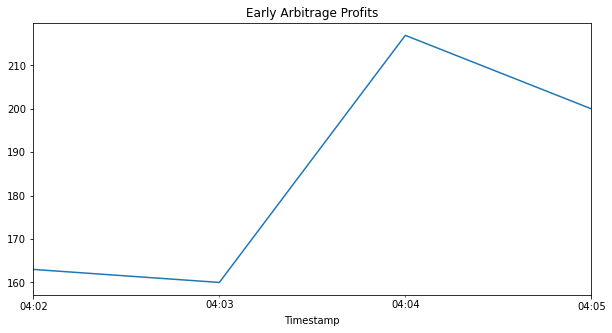

In [64]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize=(10, 5), title="Early Arbitrage Profits")


<AxesSubplot:title={'center':'Middle Arbitrage Profits'}, xlabel='Timestamp'>

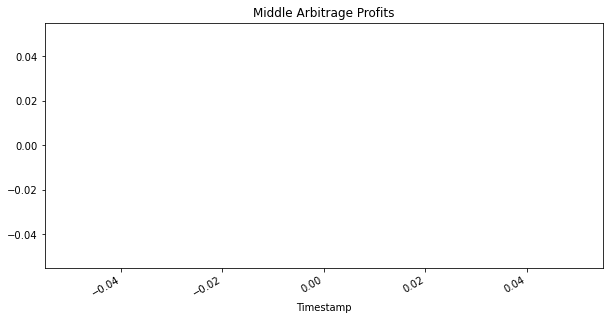

In [65]:
#to plot middle profit per trade DataFrame
profit_per_trade_middle.plot(figsize=(10, 5), title="Middle Arbitrage Profits")

#Since the DataFrame is empty no plot would be available


<AxesSubplot:title={'center':'Middle Arbitrage Profits'}, xlabel='Timestamp'>

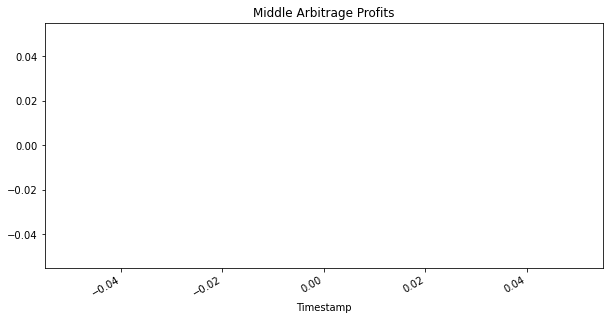

In [66]:
#to plot late profit per trade DataFrame
profit_per_trade_late.plot(figsize=(10, 5), title="Middle Arbitrage Profits")
#Since the DataFrame is empty no plot would be available

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [69]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
print(f"profit for early trade $:{profit_per_trade_early.sum()}")



profit for early trade $:739.9300000000003


In [74]:
print(f"profit for early trade $:{profit_per_trade_middle.sum()}")
if profit_per_trade_middle.sum() == 0:
    print("Sorry, no potential profitable opprotunity on this day")

profit for early trade $:0.0
Sorry, no potential profitable opprotunity on this day


In [73]:
print(f"profit for early trade $:{profit_per_trade_late.sum()}")
if profit_per_trade_late.sum() == 0:
    print("Sorry, no potential profitable opprotunity on this day")

profit for early trade $:0.0
Sorry, no potential profit opprotunity on this day


#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [54]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()
# Use the cumsum function to calculate the cumulative profits over time for the Late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()


<AxesSubplot:title={'center':'Early Cumulative Arbitrage Profit'}, xlabel='Timestamp'>

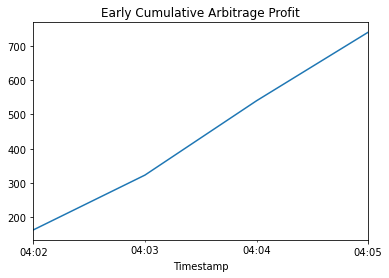

In [58]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(title= "Early Cumulative Arbitrage Profit")

<AxesSubplot:title={'center':'Middle Cumulative Arbitrage Profit'}, xlabel='Timestamp'>

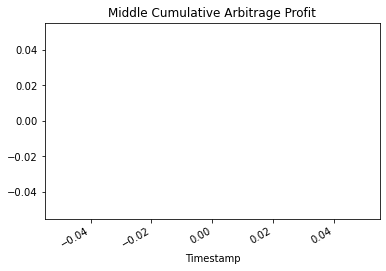

In [59]:
cumulative_profit_middle.plot(title= "Middle Cumulative Arbitrage Profit")

<AxesSubplot:title={'center':'Late Cumulative Arbitrage Profit'}, xlabel='Timestamp'>

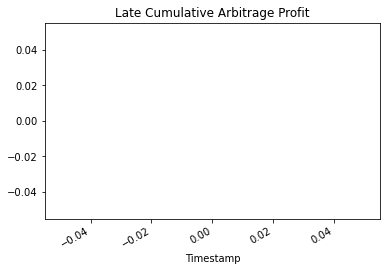

In [60]:
cumulative_profit_late.plot(title= "Late Cumulative Arbitrage Profit")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE

In [ ]:
Based on three different arbitrages, we can conclude that the prices are very close on both the platforms, hence the chances of a profitable arbitrage opportunities are minimal. 

Based on the calculations that we performed, we can see that even though there might be price differences , the cost of trade would neutralize any potential profit opportunity. 

Nevertheless, our first trade attempt on 25th January was profitable, and was able to generate aa profit of $739.39 for a single day. 
